<a href="https://colab.research.google.com/github/ABHAY1937/-ML/blob/main/Missing_streamflow_data_gap_filling_using_various%C2%A0techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [493]:
#importing EDA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [494]:
#importing file
df=pd.read_csv("/content/lowflow.csv")
df

,DATE,SF,MIT,MXT,PPT,SM,INDEX
0,01-01-1990,3.091,21.86,31.14,0.10,0.58,1
1,01-02-1990,3.321,21.89,31.23,0.01,0.58,2
2,01-03-1990,11.190,20.66,31.03,0.00,0.57,3
3,01-04-1990,4.506,20.75,30.62,0.00,0.56,4
4,01-05-1990,3.096,20.23,27.61,0.00,0.56,5
...,...,...,...,...,...,...,...
2917,12-27-1997,12.260,20.58,27.87,0.01,0.88,2918
2918,12-28-1997,9.400,20.33,27.78,0.00,0.87,2919
2919,12-29-1997,9.776,20.20,28.18,0.00,0.86,2920
2920,12-30-1997,8.200,21.05,28.57,0.00,0.84,2921


In [495]:
#top few rows of a dataset
df.head()

,DATE,SF,MIT,MXT,PPT,SM,INDEX
0,01-01-1990,3.091,21.86,31.14,0.10,0.58,1
1,01-02-1990,3.321,21.89,31.23,0.01,0.58,2
2,01-03-1990,11.190,20.66,31.03,0.00,0.57,3
3,01-04-1990,4.506,20.75,30.62,0.00,0.56,4
4,01-05-1990,3.096,20.23,27.61,0.00,0.56,5


In [496]:
#bottom few rows of a dataset
df.tail()

,DATE,SF,MIT,MXT,PPT,SM,INDEX
2917,12-27-1997,12.260,20.58,27.87,0.01,0.88,2918
2918,12-28-1997,9.400,20.33,27.78,0.00,0.87,2919
2919,12-29-1997,9.776,20.20,28.18,0.00,0.86,2920
2920,12-30-1997,8.200,21.05,28.57,0.00,0.84,2921
2921,12-31-1997,9.093,19.54,27.76,0.00,0.84,2922


In [497]:
#total number of rows and columns
df.shape

(2922, 7)

In [498]:
#data types
df.dtypes

DATE      object
SF       float64
MIT      float64
MXT      float64
PPT      float64
SM       float64
INDEX      int64
dtype: object

In [499]:
#missing value
df.isna().sum()

DATE       0
SF       383
MIT        0
MXT        0
PPT        0
SM         0
INDEX      0
dtype: int64

In [500]:
# generate descriptive statistics of the DataFrame using describe()
df.describe

<bound method NDFrame.describe of             DATE      SF    MIT    MXT   PPT    SM  INDEX
0     01-01-1990   3.091  21.86  31.14  0.10  0.58      1
1     01-02-1990   3.321  21.89  31.23  0.01  0.58      2
2     01-03-1990  11.190  20.66  31.03  0.00  0.57      3
3     01-04-1990   4.506  20.75  30.62  0.00  0.56      4
4     01-05-1990   3.096  20.23  27.61  0.00  0.56      5
...          ...     ...    ...    ...   ...   ...    ...
2917  12-27-1997  12.260  20.58  27.87  0.01  0.88   2918
2918  12-28-1997   9.400  20.33  27.78  0.00  0.87   2919
2919  12-29-1997   9.776  20.20  28.18  0.00  0.86   2920
2920  12-30-1997   8.200  21.05  28.57  0.00  0.84   2921
2921  12-31-1997   9.093  19.54  27.76  0.00  0.84   2922

[2922 rows x 7 columns]>

In [501]:
# display a summary of the DataFrame using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2922 non-null   object 
 1   SF      2539 non-null   float64
 2   MIT     2922 non-null   float64
 3   MXT     2922 non-null   float64
 4   PPT     2922 non-null   float64
 5   SM      2922 non-null   float64
 6   INDEX   2922 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.9+ KB


In [502]:
#corelation
df.corr()

<ipython-input-502-6355dc9c5db1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SF,MIT,MXT,PPT,SM,INDEX
SF,1.000000,0.108940,-0.473113,0.461784,0.550119,0.031477
MIT,0.108940,1.000000,0.166723,0.165152,-0.108120,-0.020232
MXT,-0.473113,0.166723,1.000000,-0.321081,-0.862537,-0.139390
PPT,0.461784,0.165152,-0.321081,1.000000,0.293928,0.046507
SM,0.550119,-0.108120,-0.862537,0.293928,1.000000,0.199171
INDEX,0.031477,-0.020232,-0.139390,0.046507,0.199171,1.000000


<ipython-input-503-449ab4a596bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

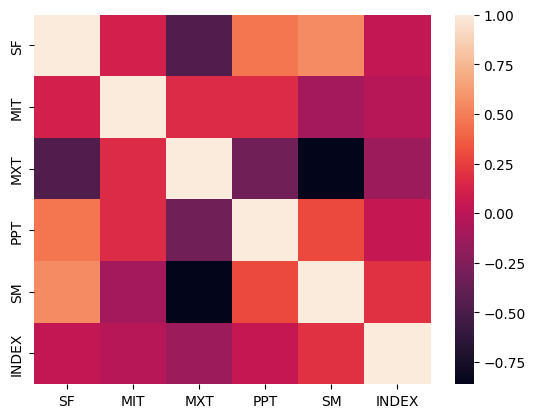

In [503]:
# plot the correlation matrix as a heatmap using seaborn
sns.heatmap(df.corr())

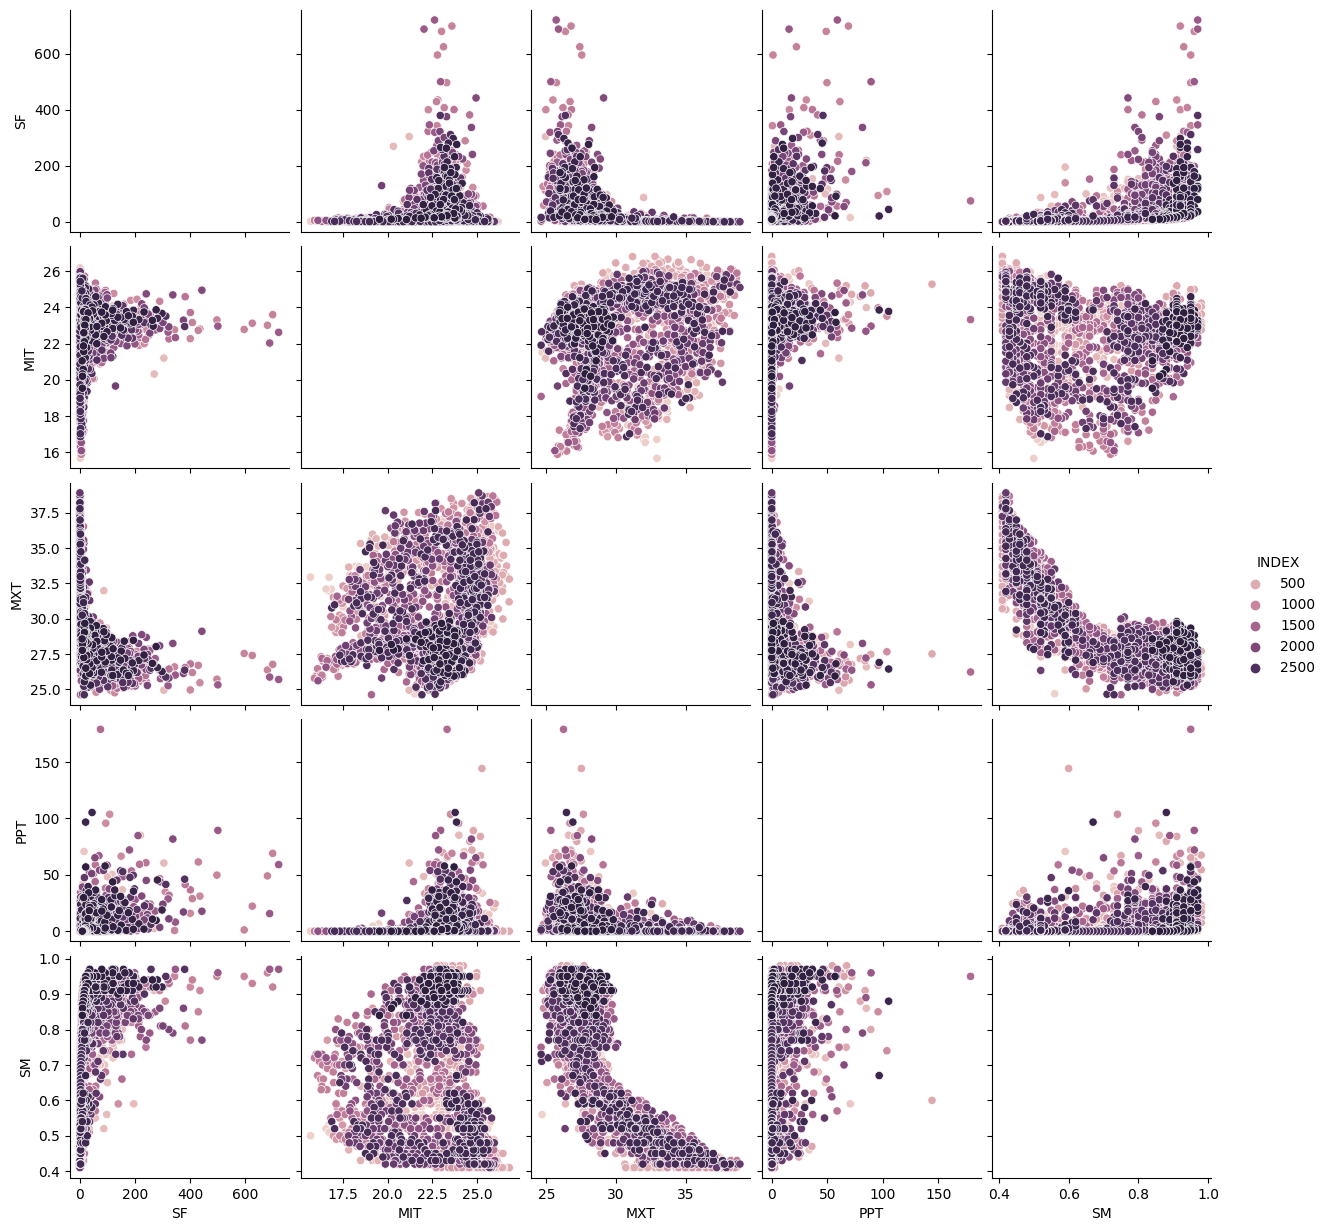

In [504]:
sns.pairplot(df,hue="INDEX")

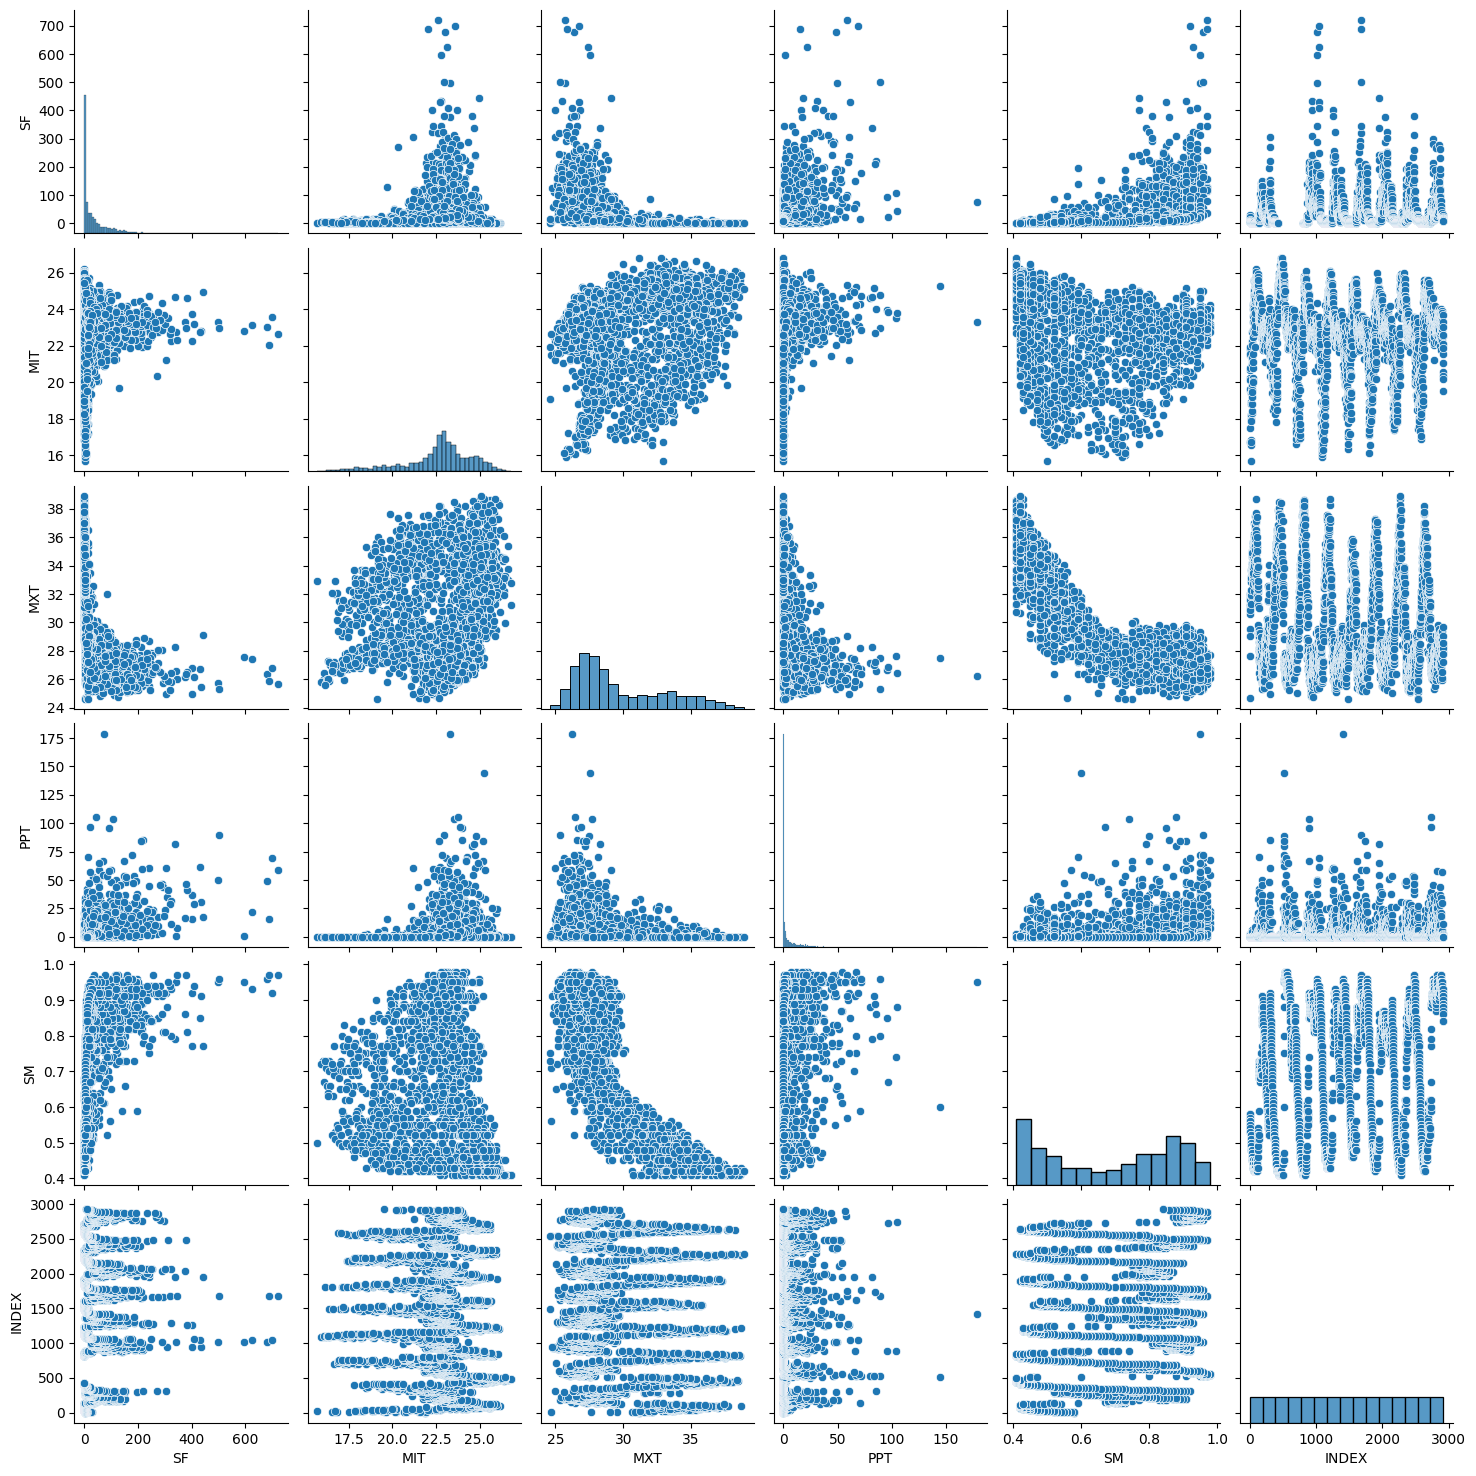

In [505]:
sns.pairplot(df)

In [506]:
#count of each objects
df["SF"].value_counts()

1.000     11
2.000      9
0.500      7
1.200      7
30.000     7
          ..
20.300     1
26.060     1
22.710     1
33.960     1
9.093      1
Name: SF, Length: 2136, dtype: int64

In [507]:
df.dtypes

DATE      object
SF       float64
MIT      float64
MXT      float64
PPT      float64
SM       float64
INDEX      int64
dtype: object

In [508]:
df["MIT"].value_counts()

23.12    25
23.01    24
23.19    23
22.94    23
22.80    23
         ..
25.74     1
18.04     1
18.25     1
17.61     1
19.54     1
Name: MIT, Length: 775, dtype: int64

In [509]:
df["MXT"].value_counts()

27.87    14
27.58    14
27.40    14
26.87    13
27.48    13
         ..
28.77     1
26.24     1
38.15     1
28.42     1
29.67     1
Name: MXT, Length: 1023, dtype: int64

In [510]:
df["PPT"].value_counts()

0.00     731
0.01     110
0.02      61
0.03      46
0.05      39
        ... 
58.81      1
10.28      1
22.18      1
38.11      1
2.49       1
Name: PPT, Length: 997, dtype: int64

In [511]:
df["SM"].value_counts()

0.91    146
0.42    130
0.48    129
0.88    115
0.45    106
0.43    104
0.84    100
0.80     84
0.41     83
0.52     83
0.95     73
0.92     73
0.85     71
0.44     68
0.77     68
0.86     64
0.87     61
0.46     57
0.89     56
0.55     55
0.59     53
0.81     50
0.90     49
0.93     48
0.73     48
0.49     48
0.82     46
0.47     46
0.79     44
0.70     44
0.94     38
0.51     37
0.78     37
0.83     36
0.62     34
0.50     34
0.76     33
0.53     32
0.54     32
0.56     30
0.66     29
0.75     28
0.96     28
0.97     26
0.72     25
0.57     24
0.74     23
0.71     22
0.69     22
0.60     22
0.68     20
0.63     20
0.58     19
0.64     18
0.61     15
0.65     14
0.67     14
0.98      8
Name: SM, dtype: int64

In [512]:
df["INDEX"].value_counts()

1       1
1941    1
1943    1
1944    1
1945    1
       ..
977     1
978     1
979     1
980     1
2922    1
Name: INDEX, Length: 2922, dtype: int64

In [513]:
#filling the missing space with mode[0]
df["SF"]=df["SF"].fillna(df["SF"].mode()[0])


In [514]:
df.isna().sum()

DATE     0
SF       0
MIT      0
MXT      0
PPT      0
SM       0
INDEX    0
dtype: int64

In [515]:
# use the get_dummies() function to convert categorical variables into numerical variables
df1=pd.get_dummies(df[["DATE"]],drop_first=True)
df1

,DATE_01-01-1991,DATE_01-01-1992,DATE_01-01-1993,DATE_01-01-1994,DATE_01-01-1995,DATE_01-01-1996,DATE_01-01-1997,DATE_01-02-1990,DATE_01-02-1991,DATE_01-02-1992,...,DATE_9-29-1996,DATE_9-29-1997,DATE_9-30-1990,DATE_9-30-1991,DATE_9-30-1992,DATE_9-30-1993,DATE_9-30-1994,DATE_9-30-1995,DATE_9-30-1996,DATE_9-30-1997
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [516]:
# concatenate the two DataFrames along the column
dfe=pd.concat([df,df1],axis=1)
dfe

,DATE,SF,MIT,MXT,PPT,SM,INDEX,DATE_01-01-1991,DATE_01-01-1992,DATE_01-01-1993,...,DATE_9-29-1996,DATE_9-29-1997,DATE_9-30-1990,DATE_9-30-1991,DATE_9-30-1992,DATE_9-30-1993,DATE_9-30-1994,DATE_9-30-1995,DATE_9-30-1996,DATE_9-30-1997
0,01-01-1990,3.091,21.86,31.14,0.10,0.58,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01-02-1990,3.321,21.89,31.23,0.01,0.58,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01-03-1990,11.190,20.66,31.03,0.00,0.57,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,01-04-1990,4.506,20.75,30.62,0.00,0.56,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,01-05-1990,3.096,20.23,27.61,0.00,0.56,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,12-27-1997,12.260,20.58,27.87,0.01,0.88,2918,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2918,12-28-1997,9.400,20.33,27.78,0.00,0.87,2919,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2919,12-29-1997,9.776,20.20,28.18,0.00,0.86,2920,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2920,12-30-1997,8.200,21.05,28.57,0.00,0.84,2921,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [517]:
#dropping column
dfe=dfe.drop(columns=["DATE"],axis=1)
dfe

,SF,MIT,MXT,PPT,SM,INDEX,DATE_01-01-1991,DATE_01-01-1992,DATE_01-01-1993,DATE_01-01-1994,...,DATE_9-29-1996,DATE_9-29-1997,DATE_9-30-1990,DATE_9-30-1991,DATE_9-30-1992,DATE_9-30-1993,DATE_9-30-1994,DATE_9-30-1995,DATE_9-30-1996,DATE_9-30-1997
0,3.091,21.86,31.14,0.10,0.58,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.321,21.89,31.23,0.01,0.58,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.190,20.66,31.03,0.00,0.57,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.506,20.75,30.62,0.00,0.56,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.096,20.23,27.61,0.00,0.56,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,12.260,20.58,27.87,0.01,0.88,2918,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2918,9.400,20.33,27.78,0.00,0.87,2919,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2919,9.776,20.20,28.18,0.00,0.86,2920,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2920,8.200,21.05,28.57,0.00,0.84,2921,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [518]:
dfe.dtypes

SF                float64
MIT               float64
MXT               float64
PPT               float64
SM                float64
                   ...   
DATE_9-30-1993      uint8
DATE_9-30-1994      uint8
DATE_9-30-1995      uint8
DATE_9-30-1996      uint8
DATE_9-30-1997      uint8
Length: 2927, dtype: object

In [519]:
dfe.isna().sum()

SF                0
MIT               0
MXT               0
PPT               0
SM                0
                 ..
DATE_9-30-1993    0
DATE_9-30-1994    0
DATE_9-30-1995    0
DATE_9-30-1996    0
DATE_9-30-1997    0
Length: 2927, dtype: int64

In [520]:
#putting a new value to data frame
x=dfe

ELBOW POINT

In [521]:
#elbow points
from sklearn.cluster import KMeans
wcss=[] #empty list
for i in range(1,11): #i = clusters 
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [522]:
print(wcss) #varients

[2091741244.398857, 532421167.35759294, 243366865.14970347, 142038002.36895257, 95543312.55231181, 69844329.25356007, 54016717.40105309, 44358501.39416009, 37531357.056672215, 32224885.179143973]


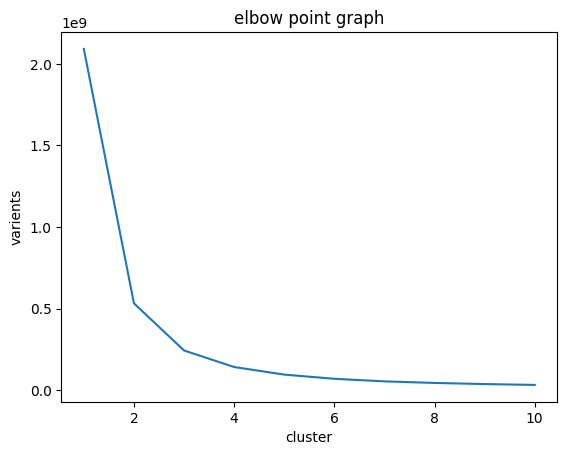

In [523]:
#elbow point graph
plt.plot(range(1,11),wcss)
plt.xlabel("cluster")
plt.ylabel("varients")
plt.title("elbow point graph")
plt.show()

In [524]:
#number of clusters = 5
Kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_pred=Kmeans.fit_predict(x)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [525]:
x["cluster"]=y_pred
x

,SF,MIT,MXT,PPT,SM,INDEX,DATE_01-01-1991,DATE_01-01-1992,DATE_01-01-1993,DATE_01-01-1994,...,DATE_9-29-1997,DATE_9-30-1990,DATE_9-30-1991,DATE_9-30-1992,DATE_9-30-1993,DATE_9-30-1994,DATE_9-30-1995,DATE_9-30-1996,DATE_9-30-1997,cluster
0,3.091,21.86,31.14,0.10,0.58,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,3.321,21.89,31.23,0.01,0.58,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,11.190,20.66,31.03,0.00,0.57,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,4.506,20.75,30.62,0.00,0.56,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3.096,20.23,27.61,0.00,0.56,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,12.260,20.58,27.87,0.01,0.88,2918,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2918,9.400,20.33,27.78,0.00,0.87,2919,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2919,9.776,20.20,28.18,0.00,0.86,2920,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2920,8.200,21.05,28.57,0.00,0.84,2921,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


<Axes: xlabel='cluster', ylabel='count'>

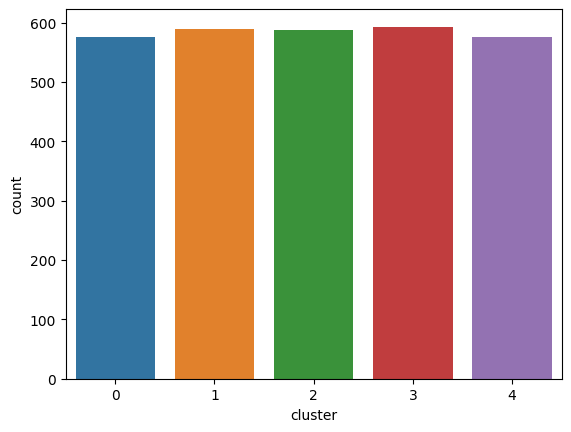

In [526]:
#count plot
sns.countplot(x="cluster",data=dfe)

In [527]:
x.isna().sum()

SF                0
MIT               0
MXT               0
PPT               0
SM                0
                 ..
DATE_9-30-1994    0
DATE_9-30-1995    0
DATE_9-30-1996    0
DATE_9-30-1997    0
cluster           0
Length: 2928, dtype: int64

In [528]:
x.dtypes

SF                float64
MIT               float64
MXT               float64
PPT               float64
SM                float64
                   ...   
DATE_9-30-1994      uint8
DATE_9-30-1995      uint8
DATE_9-30-1996      uint8
DATE_9-30-1997      uint8
cluster             int32
Length: 2928, dtype: object

In [529]:
#variable seperation\
a=x.iloc[:,:-1]
a

,SF,MIT,MXT,PPT,SM,INDEX,DATE_01-01-1991,DATE_01-01-1992,DATE_01-01-1993,DATE_01-01-1994,...,DATE_9-29-1996,DATE_9-29-1997,DATE_9-30-1990,DATE_9-30-1991,DATE_9-30-1992,DATE_9-30-1993,DATE_9-30-1994,DATE_9-30-1995,DATE_9-30-1996,DATE_9-30-1997
0,3.091,21.86,31.14,0.10,0.58,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.321,21.89,31.23,0.01,0.58,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.190,20.66,31.03,0.00,0.57,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.506,20.75,30.62,0.00,0.56,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.096,20.23,27.61,0.00,0.56,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,12.260,20.58,27.87,0.01,0.88,2918,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2918,9.400,20.33,27.78,0.00,0.87,2919,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2919,9.776,20.20,28.18,0.00,0.86,2920,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2920,8.200,21.05,28.57,0.00,0.84,2921,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [530]:
b=x.iloc[:,-1]
b

0       3
1       3
2       3
3       3
4       3
       ..
2917    4
2918    4
2919    4
2920    4
2921    4
Name: cluster, Length: 2922, dtype: int32

In [531]:
#training and testing data
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.30,random_state=0)
a_train.shape

(2045, 2927)

In [532]:
a_test.shape


(877, 2927)

In [533]:
b_train

2494    4
261     3
1771    0
2582    4
1023    1
       ..
763     1
835     1
1653    2
2607    4
2732    4
Name: cluster, Length: 2045, dtype: int32

In [534]:
b_test

1815    0
22      3
502     3
2530    4
686     1
       ..
1625    2
2365    4
2272    0
411     3
969     1
Name: cluster, Length: 877, dtype: int32

In [535]:
#normalisation
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(a_train)
a_train=scalar.fit_transform(a_train)
a_test=scalar.fit_transform(a_test)

In [536]:
#model creation
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=2)
model.fit(a_train,b_train)

RandomForestRegressor(max_depth=2)

In [537]:
#predicting
ypred=model.predict(a_test)
ypred

array([0.40288239, 2.40479336, 2.40479336, 4.        , 1.60767574,
       1.60767574, 1.60767574, 2.40479336, 0.40288239, 1.60767574,
       1.60767574, 2.40479336, 0.40288239, 1.60767574, 1.60767574,
       2.40479336, 4.        , 0.40288239, 1.60767574, 2.40479336,
       1.60767574, 1.60767574, 1.60767574, 0.40288239, 0.40288239,
       1.60767574, 0.40288239, 1.60767574, 1.60767574, 1.60767574,
       0.40288239, 4.        , 1.60767574, 1.60767574, 4.        ,
       0.40288239, 1.60767574, 1.60767574, 0.40288239, 1.60767574,
       0.40288239, 1.60767574, 4.        , 1.60767574, 0.40288239,
       4.        , 0.40288239, 2.40479336, 1.60767574, 0.40288239,
       2.40479336, 2.40479336, 1.60767574, 1.60767574, 2.40479336,
       1.60767574, 2.40479336, 4.        , 0.40288239, 0.40288239,
       4.        , 2.40479336, 1.60767574, 4.        , 4.        ,
       2.40479336, 1.60767574, 4.        , 2.40479336, 1.60767574,
       4.        , 1.60767574, 0.40288239, 0.40288239, 2.40479

***plotting random forest***

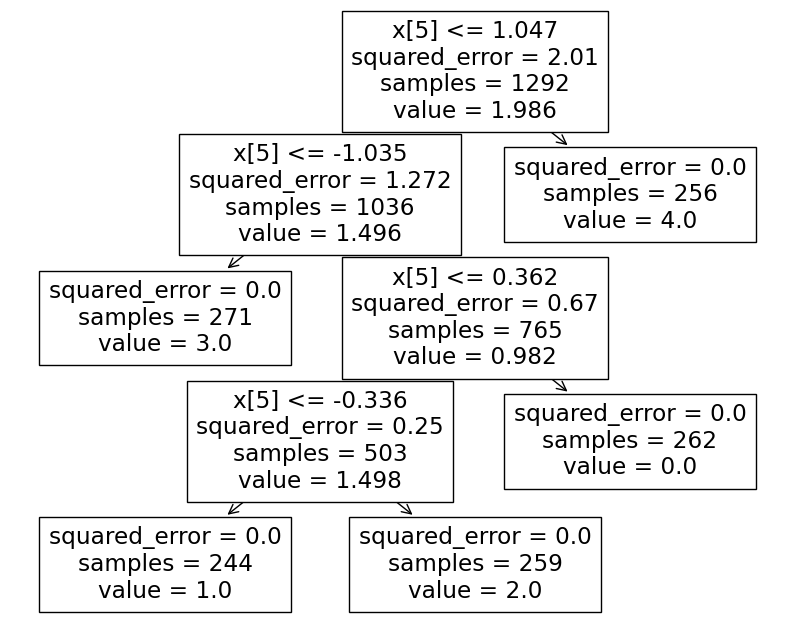

In [538]:
from sklearn.tree import plot_tree
# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=10)
# Train the classifier on the dataset
clf.fit(a_train, b_train)

# Create a figure with a desired size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot a single decision tree from the random forest
plot_tree(clf.estimators_[0], ax=ax)

# Show the plot
plt.show()


PERFORMANCE EVALUATION METHODS

In [539]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(b_test,ypred)
mae

0.41532034557438213

In [540]:
#mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(b_test,ypred)
mape

361908617095581.6

In [541]:
#mean squared error
from sklearn.metrics import mean_squared_error
print("mean squared error :",mean_squared_error(b_test,ypred))

mean squared error : 0.24596580076044483


In [542]:
#root mean squared error
root=mean_squared_error(b_test,ypred)
print("root mean absolute error :",np.sqrt(root))

root mean absolute error : 0.4959493933461809


In [543]:
#r2 score ==> coefficent of detremination     
from sklearn.metrics import r2_score
print("r2 score :",r2_score(b_test,ypred))

r2 score : 0.8760194573799511


In [544]:
#creating a data frame
pd.DataFrame(data={'prediction_value': ypred,'actual_value':b_test,"error": b_test - ypred})

,prediction_value,actual_value,error
1815,0.402882,0,-0.402882
22,2.404793,3,0.595207
502,2.404793,3,0.595207
2530,4.000000,4,0.000000
686,1.607676,1,-0.607676
...,...,...,...
1625,1.607676,2,0.392324
2365,4.000000,4,0.000000
2272,0.402882,0,-0.402882
411,2.404793,3,0.595207


plotting graph using	prediction_value,	actual_value

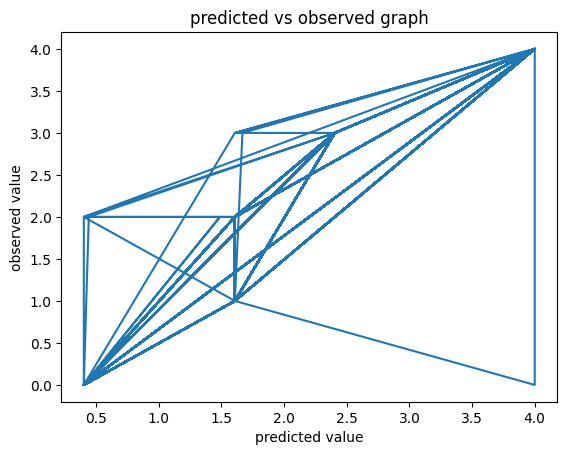

In [545]:
plt.plot(ypred,b_test)
plt.xlabel("predicted value")
plt.ylabel("observed value")
plt.title("predicted vs observed graph")
plt.show()